# INTRODUCTION
In this data analysis report we will focus on Feature Visualization and Selection. During this tutorial we will apply different methods as Feature Selection with Correlation, Univariate Feature Selection, Recursive Feature Elimination, Recursive Feature Elimination with Cross Validation and Tree Based Feature Selection Methods, applying Random Forest algorithm as a classifier.
# Data Analysis

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/deister/AI/master/resources/breast_cancer.csv', delimiter=';')

Before we start applying Feature Selections or Classifications lets take a glimpse to our Data Features.

In [4]:
data.head()  # head method will show the first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can observe there is an ID that cannot be used for classification and Diagnosis is our class label. We need to remove these two features.  


In [12]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [14]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


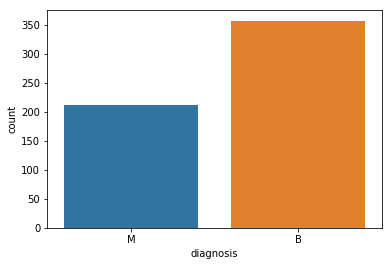

In [15]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Okey, now we are working with the features we need. We apply the DESCRIBE function that helps us to understand what is going on with our data. For example, we can observe that the area_mean feature's max value is 2500 and the smoothness_mean features' max is 0.16340.

In [16]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,315.194921,25.677223,107.261213,880.583128,0.132369,2.111808,4.410401,0.114606,0.290076,0.083946
std,2430.243368,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,1655.459336,6.146258,33.602542,569.356993,0.022832,44.343334,69.928599,0.065732,0.061867,0.018061
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.210000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.180000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.850000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,15.150000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,17.680000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,19.850000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9904.000000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,9981.000000,49.540000,251.200000,4254.000000,0.222600,1058.000000,1252.000000,0.291000,0.663800,0.207500


# Visualization
In order to visualizate our data more clearly we are going to standardize our data, because the differences between the values of our features are very high to observe on plot.

In [54]:

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data_n_2.head()                                             # print first 5 rows

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.283421,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-0.175066,-1.358098,2.301575,1.999478,1.306537,-0.032614,-0.052890,2.294058,2.748204,1.935312
1,-0.282359,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.175302,-0.368879,1.533776,1.888827,-0.375282,-0.043416,-0.059615,1.086129,-0.243675,0.280943
2,-0.282721,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.176160,-0.023953,1.346291,1.455004,0.526944,-0.038051,-0.056629,1.953282,1.151242,0.201214
3,-0.286124,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.181391,0.133866,-0.249720,-0.549538,3.391291,-0.028088,-0.053247,2.173873,6.040726,4.930672
4,-0.282474,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-0.176782,-1.465481,1.337363,1.219651,0.220362,-0.043001,-0.057350,0.728618,-0.867590,-0.396751


# Feature Selection and Random Forest Classification

Our main purpose is to try different methods to finally be able to compare them and choose which one is the best. We will use Random Forest Classification in order to train our model and make predictions.

## 1) Feature Selection with Correlation and Random Forest Classification

Insted of using radius_mean, perimeter_mean and area_mean, which are correlated, we will only use area_mean.
I have chosen area_mean as a feature to use, but actually there isn't a correct answer. We cannot make exact separation among other correlated features without trying. So lets find other correlated features and observe their accuracy with the Random Forest Classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Therefore I only choose concavity_mean. 
Apart from these, I only use area_se from radius_se, perimeter_se and area_se. 
From radius_worst, perimeter_worst and area_worst which are correlated I only use area_worst. 
From compactness_worst, concavity_worst and concave points_worst I only use concavity_worst. 
Between compactness_se, concavity_se and concave points_se I use concavity_se. 
And finally, between texture_mean and texture_worst which are correlated I will only use texture_mean. 

In [34]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1156.0000,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


Once we have dropped our correlated features we preceed executing a Correlation Matrix.

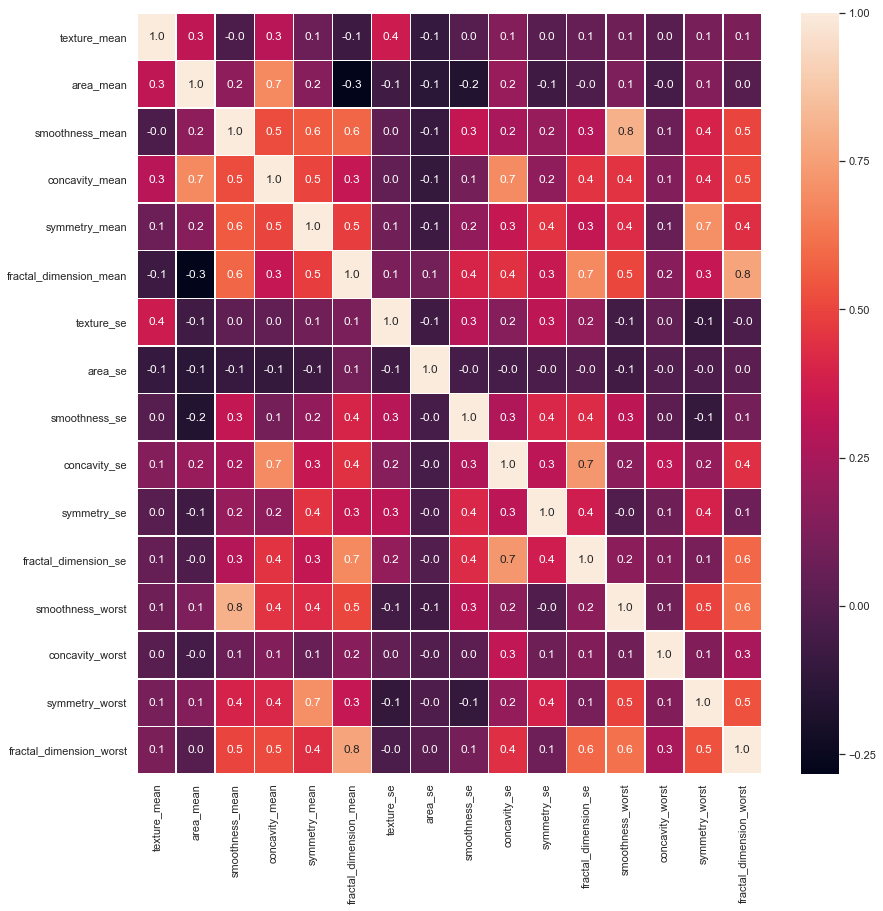

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we chose our features but did we choose correctly? Lets use random forest and find the accuracy according to our chosen features.

Accuracy is:  0.9649122807017544


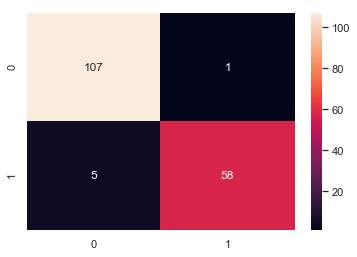

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

The Random Forest Accuracy is almost 97% and as it can be seen in confusion matrix, we make few wrong predictions. Now lets see other feature selection methods to find better results.

## 2) Univariate Feature Selection and Random Forest Classification
In univariate feature selection, we will use the SelectKBest method.

In this method we need to choose how many features we will use. For example, will k (number of features) be 5, 10 or 15? The answer is only trying or intuitively. I won't try all combinations but I will only choose k = 5 and find the best 5 features.

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [56]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 3.49122844e+02 4.03424676e+04
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


The best 5 feature to classify are area_mean, area_se, texture_mean, concavity_worst and concavity_mean. So lets see what happens if we only use the 5 best scored features.

Accuracy is:  0.9649122807017544


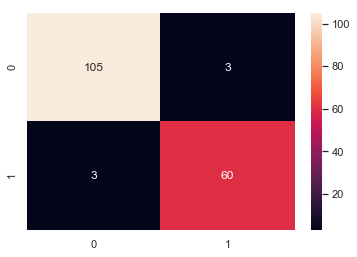

In [43]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is almost 97% and it has the same score as the previous one. As it can be seen in confusion matrix, we make few wrong prediction. Although we use 5 features using the selectkBest method the accuracy looks similar. Now lets see the other feature selection methods in search for better results.

## 3) Recursive feature elimination (RFE) with random forest

Basically it uses the Random Forest Algorithm assigning weights to each of the features. Whose absolute weights are the smallest, they will be removed from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features is accomplished.

Like the previous method, we will only use 5 features. However, which 5 features will we use? We will choose them with the RFE method.

In [44]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [45]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


The chosen 5 best features by the RFE Method are texture_mean, area_mean, concavity_mean, area_se and concavity_worst. These features are the same as the ones we saw with the previous method. Shortly, we can say that we made a good feature selection with the RFE and the selectkBest methods.

However, there is a problem. We have found the same 5 features with two different methods. Maybe if we use best 2 or 15 features (who knows) we will have better accuracy. Therefore lets see how many features do we need to use with the RFECV
method.

## 4) Recursive Feature Elimination with Cross Validation and Random Forest Classification

Using this method apart from finding the best features we will find how many do we need for the best accuracy. 


In [46]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Finally we found that the optimal number of features is 16:

'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'

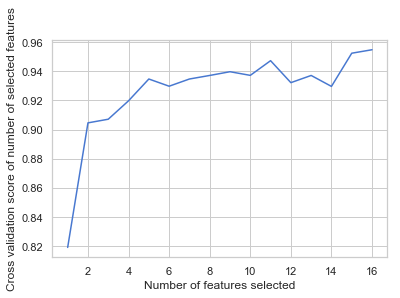

In [47]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

With this graph we can observe which should be the number of features selected for getting the highest accuracy.

## 5) Tree Based Feature Selection and Random Forest Classification
In the Random Forest Classification Method there is a Feature Importance Attribute which classifies the importance of the Attributes. To use the feature_importance method, in training data there should not be correlated features. Random forest chooses randomly at each iteration, therefore the sequence of feature importance list can change.

Feature ranking:
1. feature 1 (0.332705)
2. feature 13 (0.229157)
3. feature 3 (0.130645)
4. feature 12 (0.066517)
5. feature 7 (0.043666)
6. feature 0 (0.036519)
7. feature 9 (0.034677)
8. feature 2 (0.030283)
9. feature 8 (0.017110)
10. feature 4 (0.016050)
11. feature 5 (0.015870)
12. feature 15 (0.015198)
13. feature 6 (0.010534)
14. feature 14 (0.007828)
15. feature 10 (0.007414)
16. feature 11 (0.005826)


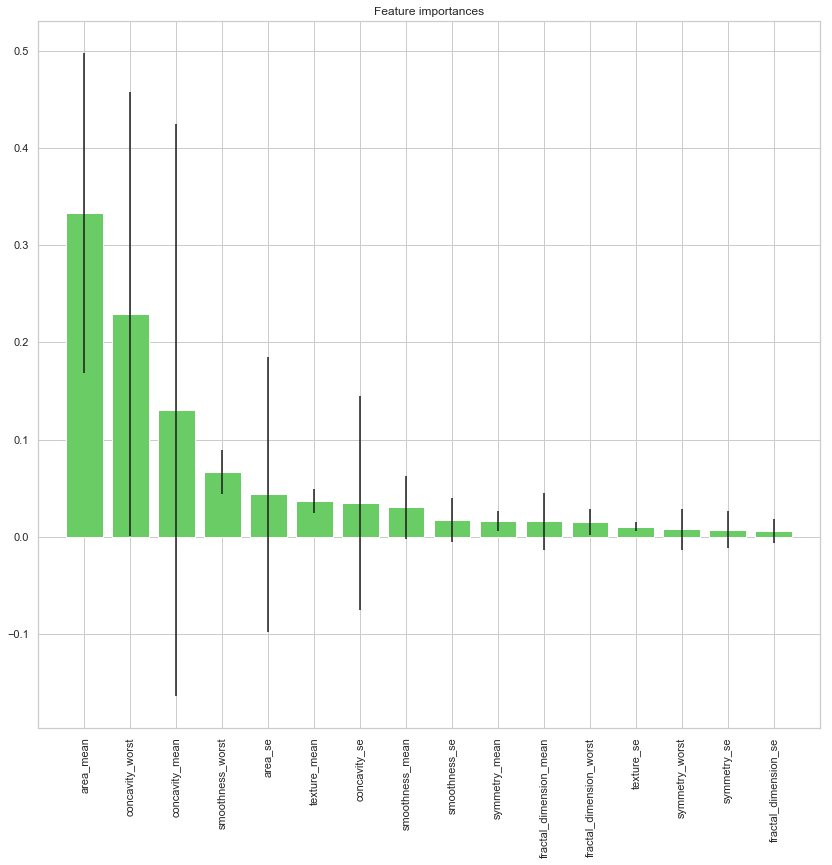

In [48]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can see above in the plot, after 5 best features importance of features, it decreases. Therefore we can focus these 5 features.

# Feature Extraction
We will use the Principle Component Analysis (PCA) for feature extraction. Before the PCA Method, we need to normalize our data for a better performance of PCA.

Text(0, 0.5, 'explained_variance_ratio_')

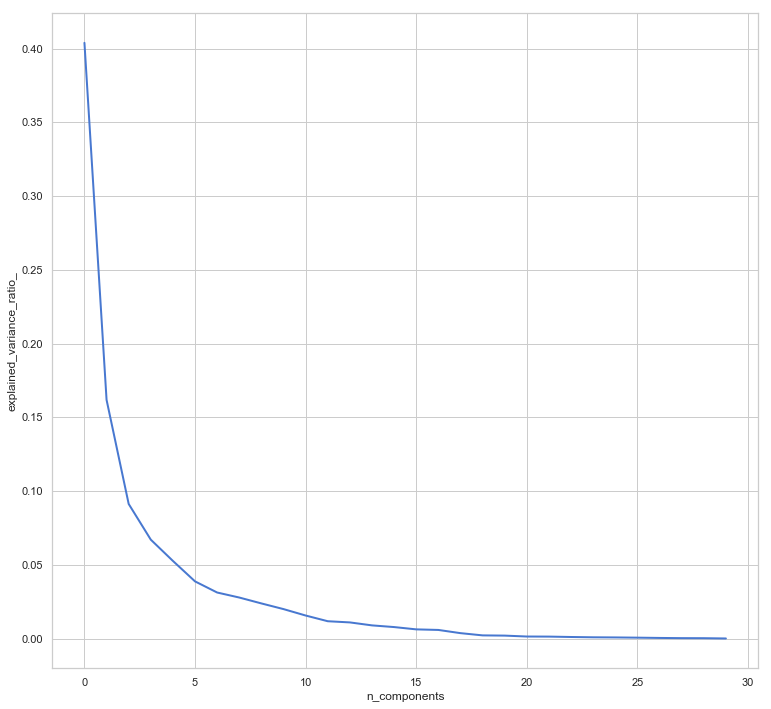

In [49]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

According to the variance ration, 3 components can be chosen.

# Conclusion

All in all, we tried to show the importance of feature selection and data visualization. 

Our default data included 33 feature but after the feature selection that we applied, we dropped from 33 to 5 with an accuracy of 97% . In this document we just tried to explain basic things and the importance of manipulating the data for getting better results in the end. We are sure that with these data visualization and feature selection methods, you can easily ecxeed the 97% of accuracy that we obtained.